<a href="https://colab.research.google.com/github/jaesunkkk/hongong_txtbook/blob/main/Chapter6_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##6-1. 군집 알고리즘

### 타깃을 모르는 비지도학습 (타깃이 없을때 데이터 학습)


In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-02-24 05:58:56--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-02-24 05:58:56--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-02-24 05:58:57--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

- !는 이후명령을 리눅스 셸 명령으로 이해

- wget은 원격주소에서 데이터 다운로드하여 저장, -O옵션에서 저장할 파일이름 지정(좌측의 파일탭에서 확인가능)

### 과일 사진 데이터 준비하기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fruits=np.load('fruits_300.npy')

In [ ]:
print(fruits.shape)
# 300(샘플의 개수) 100(이미지 높이) 100(이미지 너비) => 이미지 크기 : 100*100

(300, 100, 100)


In [ ]:
#첫번째 이미지의 첫번째 행 (픽셀 100개의 값)
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


이 넘파이 배열: 흑백사진을 담고있으므로 0~255까지의 정숫값

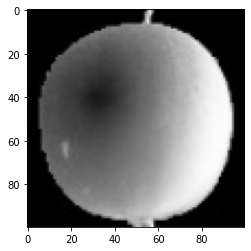

In [ ]:
plt.imshow(fruits[0],cmap='gray')
plt.show()
# 첫 번째 행이 위에서 출력한 배열값 (0에 가까울수록 짙고 높은값은 밝게 표시) => '사과'에 집중

보통 흑백 샘플: 바탕이 밝고 물체가 어둡 -> 해당 이미지: 넘파이 배열로 변환할 떄 반전 시킨 것임 

=> 물체가 밝도록 반전 why? 반전시키지 않는다면 컴퓨터는 255에 가까운 바탕에 집중할 것

=> 컴퓨터는 왜 255에 가까운 바탕에 집중? 알고리즘은 출력을 만들기 위해 곱셈, 덧셈을 하는데 픽셀값이 0이면 출력도 0이 되므로 의미가 없음

 (픽셀값이 높으면 출력값도 커지므로 의미부여 하기 좋음)

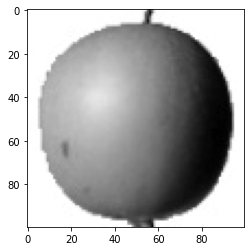

In [ ]:
#매개변수 cmap을 'gray_r'로 지정하면 다시 반전해서 우리 눈에 보기 좋게 출력
#이 그림에서는 밝은부분 0. 짙은부분 255에 가까움
plt.imshow(fruits[0],cmap='gray_r')
plt.show()

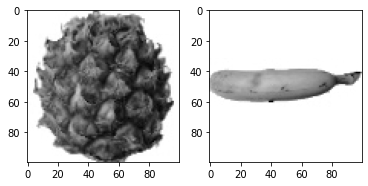

In [ ]:
# subplots() : 여러개의 그래프를 배열처럼 쌓음 여기서는 1행 2열
# 반환된 axs는 2개의 서브 그래프 담고 있는 배열
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100],cmap='gray_r')
axs[1].imshow(fruits[200],cmap='gray_r')
plt.show()

### 픽셀값 분석하기

- fruits 데이터를 사과, 파인애플, 바나나로 각각 나누기 (넘파이 배열 100*100을 길이가 100000인 1차원 배열로 만들기)

In [ ]:
# 순서대로 100개씩 선택, reshape 메서드를 사용하여 두번째차원과 세번째 차원을 10000으로 합침 (첫번째 차원 -1로 지정)
apple=fruits[0:100].reshape(-1,100*100)
pineapple=fruits[100:200].reshape(-1, 100*100)
banana= fruits[200:300].reshape(-1,100*100)

In [ ]:
print(apple.shape)

(100, 10000)


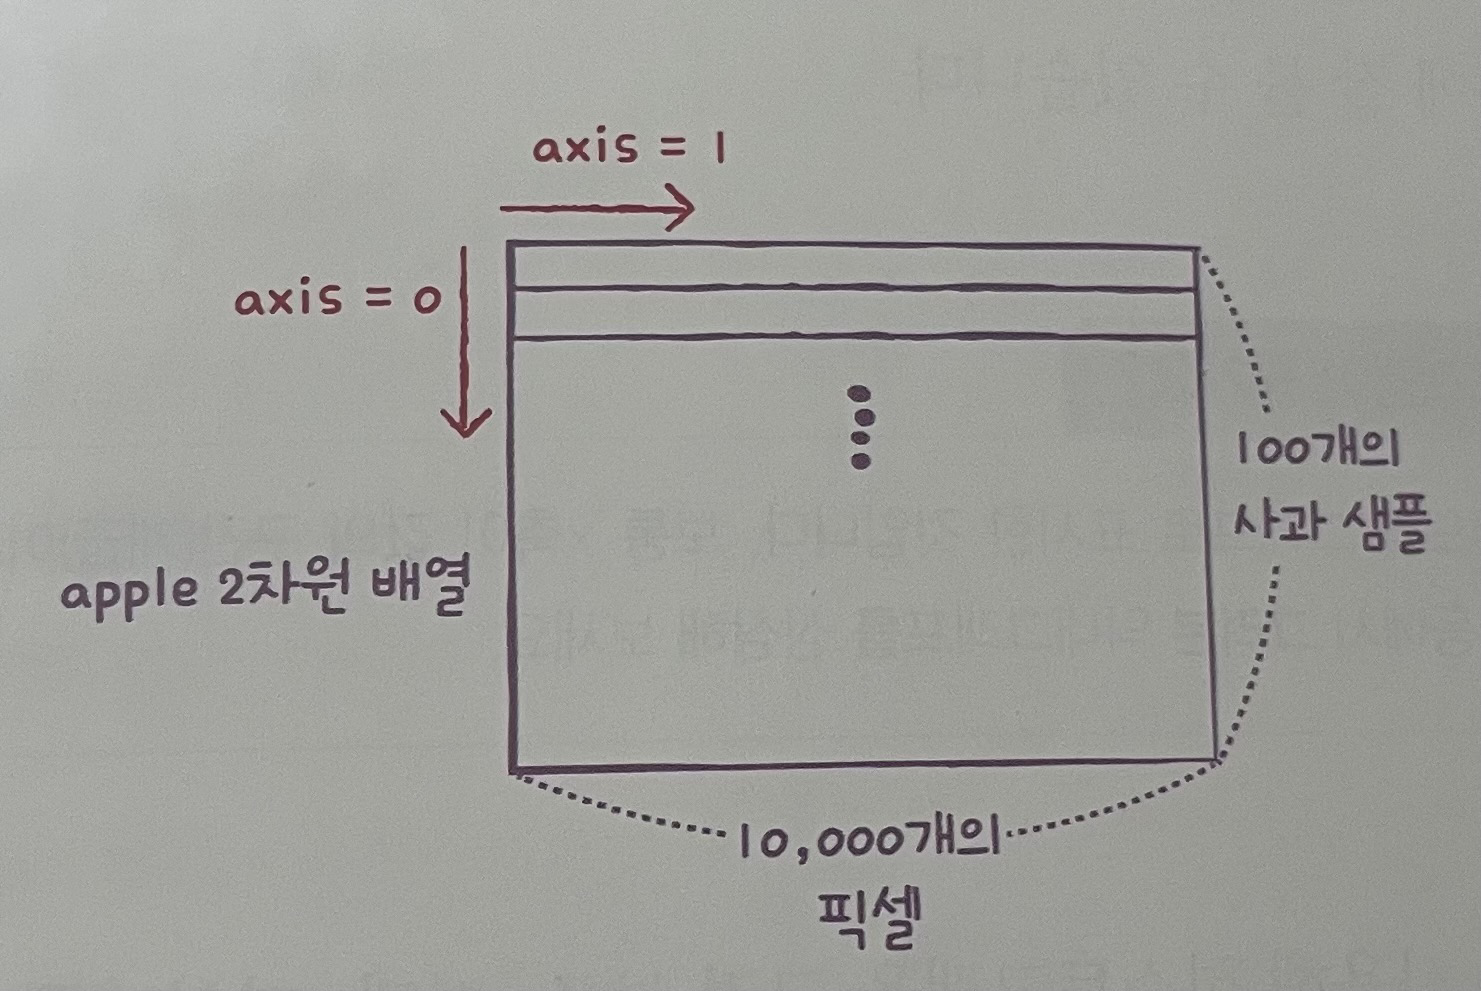

In [ ]:
#샘플의 평균값 계산 : 넘파이 mean() 이용
#샘플은 10000으로 가로로 나열했으니 열을 따라 계산하는 axis=1 적용 => 요소 100개 
# 사과 샘플 100개에 대한 픽셀 평균값
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


- axis=1 : 가로로 이동 (열을 따라 = 행 안에서 계산) 
- axis=0: 세로로 이동 (행을 따라)

(array([21., 21., 27., 11.,  9.,  4.,  5.,  0.,  1.,  1.]),
 array([18.568  , 24.79665, 31.0253 , 37.25395, 43.4826 , 49.71125,
        55.9399 , 62.16855, 68.3972 , 74.62585, 80.8545 ]),
 <a list of 10 Patch objects>)

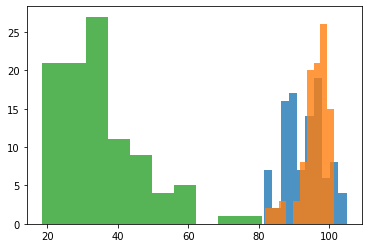

In [ ]:
#histogram
plt.hist(np.mean(apple,axis=1),alpha=0.8)
plt.hist(np.mean(pineapple,axis=1),alpha=0.8)
plt.hist(np.mean(banana,axis=1),alpha=0.8)

바나나 평균값: 40아래에 집중

사과&파인애플 : 90~100 사이에 모여있음 

=> 픽셀 평균값만으로 바나나는 사과, 파인애플과 구분

(바나나는 사진에서 차지하는 영역이 작아서 평균값 작음)

(사과와 파인애플은 형태가 동그랗고 사진에서 차지하는 크기도 비슷해서 픽셀값만으로는 구분어려움)

=> how? 전체샘플에 대해 각 픽셀의 평균 계산 ! (픽셀별 평균값 비교)

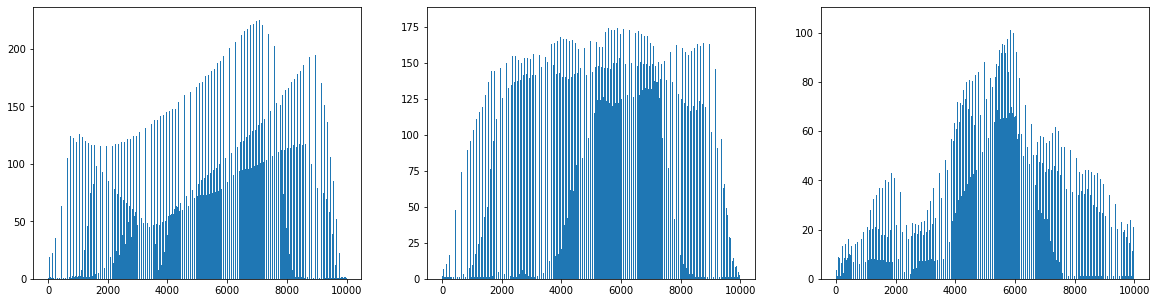

In [ ]:
#bar
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(pineapple,axis=0))
axs[2].bar(range(10000),np.mean(banana,axis=0))
plt.show()

순서대로 사과, 파인애플, 바나나

과일마다 값이 높은 구간이 다름

- 사과는 사진 아래쪽으로 갈수록 값이 높음,
 
- 파인애플은 비교적 고르게 높음,
  
- 바나나는 중앙의 픽셀값이 높음

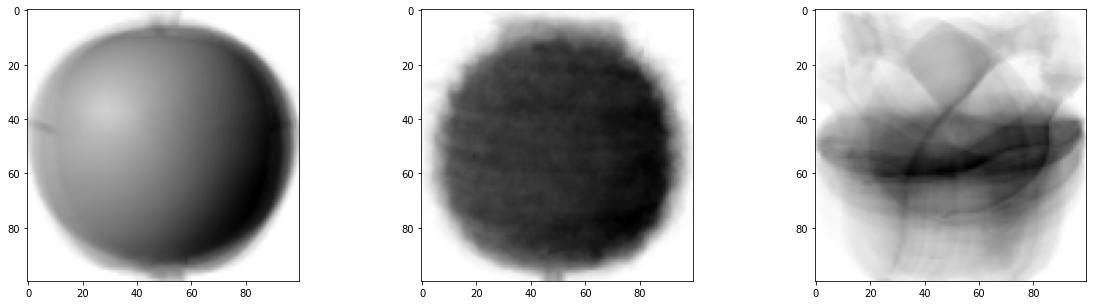

In [ ]:
#계산한 10000개의 각 픽셀 평균값을 100,100으로 바꿔서 그리는 것 
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean,cmap='gray_r')
axs[1].imshow(pineapple_mean,cmap='gray_r')
axs[2].imshow(banana_mean,cmap='gray_r')

픽셀 평균값을 100*100크기로 바꿔서 이미처럼 출력하여 위 그래프와 비교

픽셀을 평균 낸 이미지를 모든 사진을 합쳐놓은 대표 이미지로 생각

### 평균값과 가까운 사진 고르기

사과 사진의 평균값인 apple_mean과 가장 가까운 사진 고르기! (절댓값 오차 사용)

: fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값의 평균을 계산 (mae) <-> 결정계수와 달리 직관적임

In [ ]:
abs_diff=np.abs(fruits - apple_mean) # (300,100,100) 배열
abs_mean = np.mean(abs_diff,axis=(1,2)) #각 샘플에 대한 평균을 구하기 위해 axis에 두번쨰, 세번째 차원 지정
print(abs_mean.shape) 

(300,)


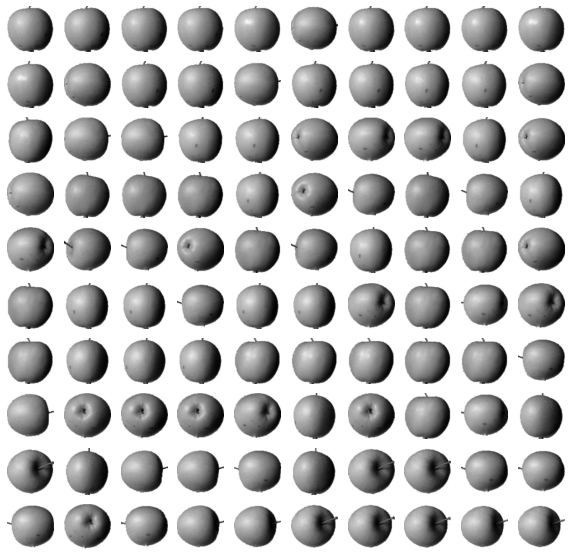

In [ ]:
apple_index=np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10+j]],cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

mae 가장 작은 순서대로 100개 고르기 (오차가 가장 작은 샘플 100개)

np.argsort()함수 : 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스 반환

=> apple_mean 과 가장 가까운 사진 100개를 골랐더니 모두 사과

###정리 !

흑백 사진의 픽셀값을 사용하여 과일 사진 모으는 작업진행

-군집: 비슷한 샘플끼리 그룹으로 모으는 작업

- 클러스터: 군집 알고리즘에서 만든 그룹

지금까지는 타깃값 (사과, 파인애플, 바나나)를 알고 있었으므로 각 사진의 평균값 계산해서 가까운 과일을 찾음 그러나 실제 비지도학습은 타깃값을 모름 ! => k-평균 알고리즘 이용할 것

## 6-2. K 평균

- k-평균 군집 알고리즘: 평균값을 자동으로 찾아줌 (클러스터의 중심에 위치하므로 클러스터 중심, 센트로이드라 부름)

1. 무작위로 k개 클러스터 중심 정함

2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 클러스터 샘플로 지정

3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심변경

4. 클러스터 중심 변화 없을 때까지 2번으로 돌아가 반복

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-02-24 06:00:02--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-02-24 06:00:02--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-02-24 06:00:03--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np
fruits= np.load('fruits_300.npy')
#2차원 변경
fruits_2d= fruits.reshape(-1,100*100)

In [ ]:
#비지도학습이므로 fit() 메서드에서 타깃 데이터 사용안함
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [ ]:
#군집 결과 labels_속성에 저장됨, 배열의 길이는 샘플개수와 같음
#labels_배열의 값은 0,1,2 중 하나 (n_clusters=으로 지정했으므로)
print(km.labels_)
print(km.labels_.shape)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(300,)


In [ ]:
#레이블 0,1,2로 모은 샘플의 개수 확인
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


label 0: 111개

label 1: 98개

label 2: 91개

In [ ]:
import matplotlib.pyplot as plt

#(샘플개수, 너비, 높이)의 3차원 배열을 입력받아 가로로 10개씩 이미지 출력
#샘플 개수에 따라 행과 열의 개수 계산, figsize 지정
#figsize는 ratio 매개변수에 비례하여 커짐 (기본값 1)

def draw_fruits(arr,ratio=1):
  n=len(arr) #샘플개수
  #한줄에 10개씩 이미지 그림 (샘플개수를 10으로 나눠서)
  rows=int(np.ceil(n/10))
  #행이 1개면 열의 개수는 샘플개수 그렇지 않으면 100개
  cols=n if rows<2 else 10
  fig, axs=plt.subplots(rows,cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  
  for i in range(rows):
    for j in range(cols):
      if i*10 + j <n: #n개까지만 그리기
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

In [ ]:
#(샘플개수, 너비, 높이)의 3차원 배열을 입력받아 가로로 10개씩 이미지 출력
#샘플 개수에 따라 행과 열의 개수 계산, figsize 지정
#figsize는 ratio 매개변수에 비례하여 커짐 (기본값 1)

def draw_fruits(arr,ratio=1):
  n=len(arr)   #사진 몇게 있는지 판단

  rows=int(np.ceil(n/10))   #ceil올림함수//몇행으로 결정
  cols=n if rows<2 else 10 #만약에 1행 열을 10으로 고정

  fig,axs=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

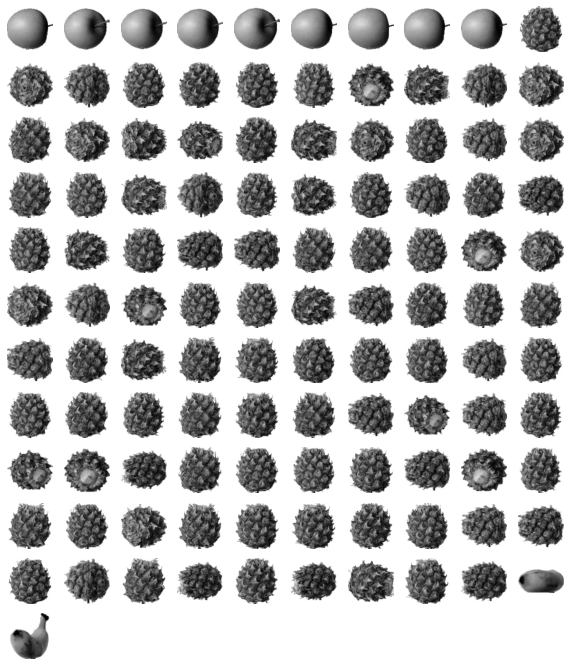

In [ ]:
#불리언 인덱싱 (조건)을 통해 km.labels_==0 (label: 0)인 이미지 출력
draw_fruits(fruits[km.labels_==0])

In [ ]:
draw_fruits(fruits[km.labels_==1])

In [ ]:
draw_fruits(fruits[km.labels_==2])

### 클러스터 중심

- KMeans 클래스가 최종적으로 찾은 클러스터의 중심: cluster_centers_속성에 저장되어있음

(이 배열은 fruits_2d 샘플의 클러스터 중심이므로 이미지로 출력하려면 100*100 2차원배열로 변경)

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1,100,11),ratio=3)

: 픽셀 평균값과 매우 유사

KMeans 클래스: 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 transform()메서드를 가지고 있음

transfor() 메서드 있다 : StandardScaler 클래스처럼 특성값을 변환하는 도구로 사용가능

In [ ]:
#인덱스가 100인 샘플에 transform 적용
print(km.transform(fruits_2d[100:101]))

fit() 메서드와 마찬가지로 2차원 배열 기대함 => 슬라이싱 통해 (1,10000) 크기 배열 전달

In [ ]:
fruits_2d[100]

In [ ]:
fruits_2d[100:101]